<a href="https://colab.research.google.com/github/KarlaKollontaj/DataScienceMachineLearningProjects/blob/main/telescope_supervisedLearning_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [4]:
#i dati non avevono labels nelle colonne, così li ho creati, leggo il csv dando i nomi delle colonne e lo visulaizzo
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
#vediamo quali sono i dati della colonna class (il risultato: g sta per gamma, h sta per adrone)
df['class'].unique()

array(['g', 'h'], dtype=object)

In [22]:
#Converto la colonna 'class' del DataFrame df da una serie di stringhe (presumibilmente con 'g' e 'h') in una serie di interi dove 'g' viene rappresentato come 1 e h come 0
#passo a passo:
#1)df['class']: Questa parte del codice seleziona la colonna esistente nel DataFrame df chiamata 'class'.
#2)(df['class'] == 'g'): Questa espressione compara ciascun valore nella colonna 'class' con la stringa 'g'. Restituirà una serie di valori booleani, dove ogni valore sarà True se il valore nella colonna 'class' è 'g' e False altrimenti.
#In altre parole, questa parte del codice crea una serie booleana che indica se ciascun elemento della colonna 'class' è uguale a 'g'.
#3).astype(int): Questo metodo converte la serie booleana ottenuta nel passaggio precedente in una serie di interi. Quando si converte True in un intero, diventa 1, e False diventa 0.
#Quindi, alla fine, la colonna 'class' conterrà valori 1 per gli elementi che soddisfano la condizione (cioè, dove 'class' è uguale a 'g') e 0 per gli altri elementi.
df['class'] = (df['class'] == 'g').astype(int)

In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


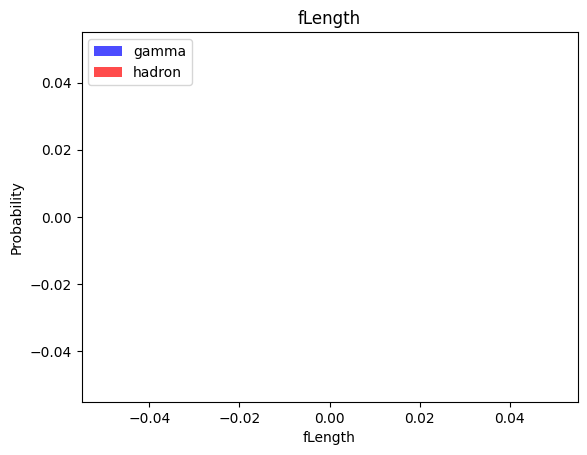

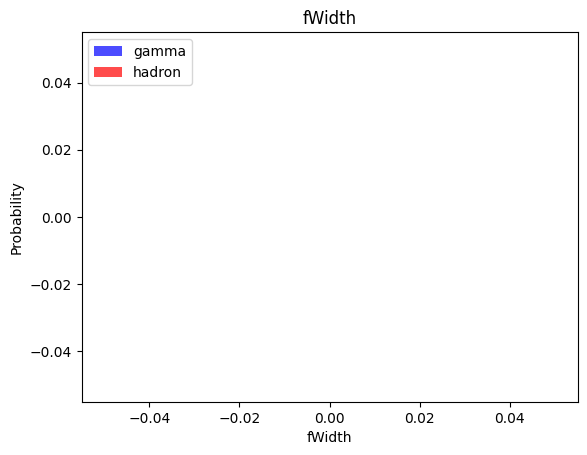

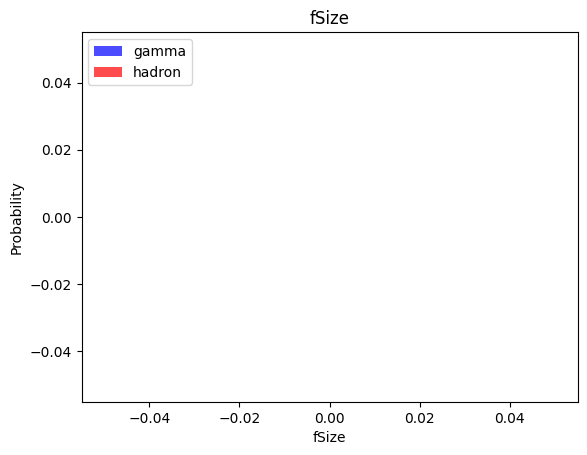

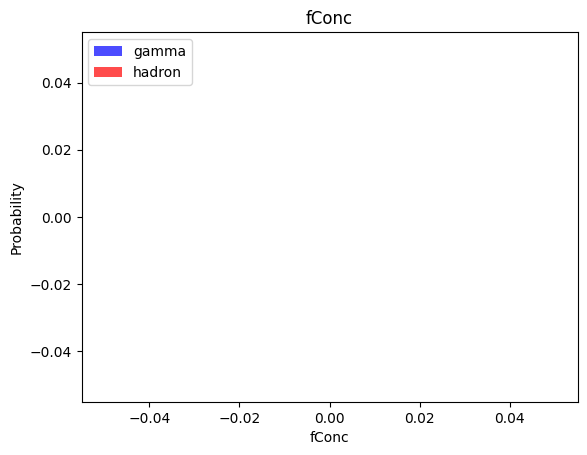

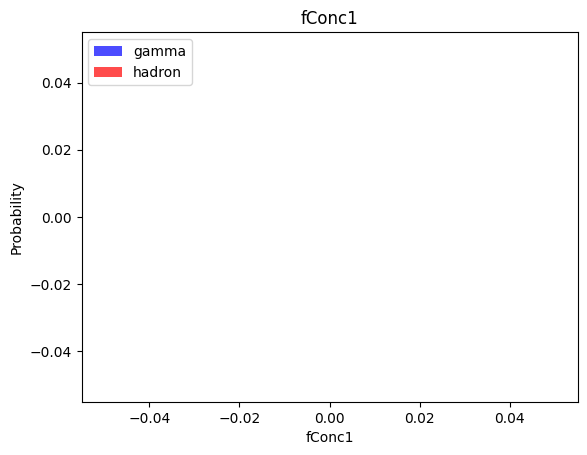

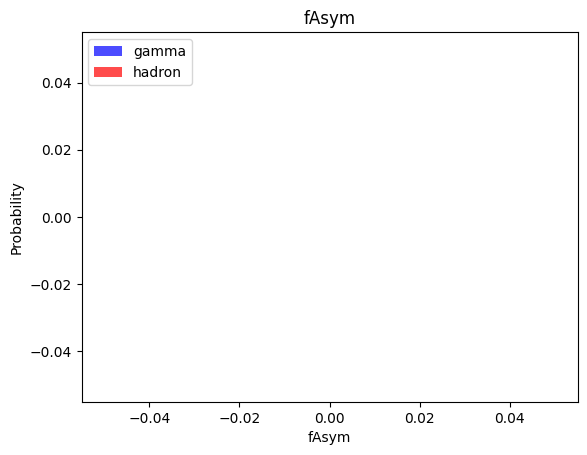

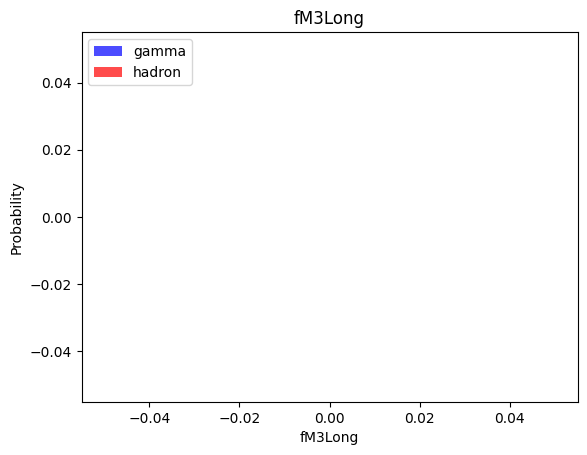

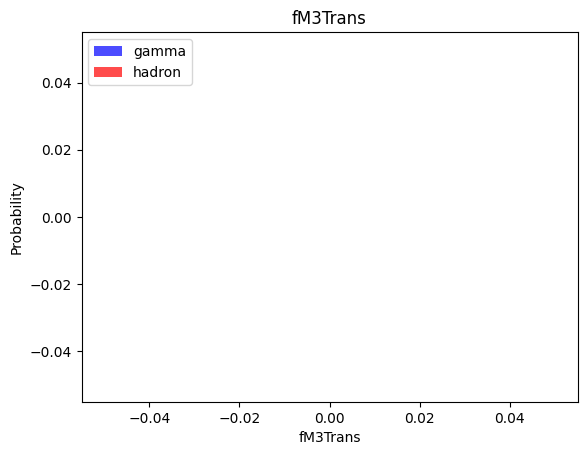

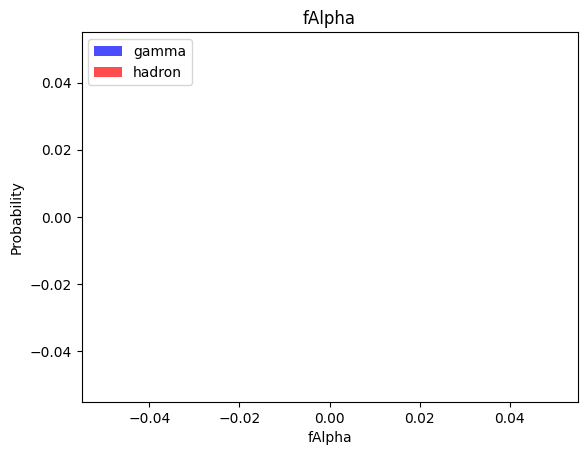

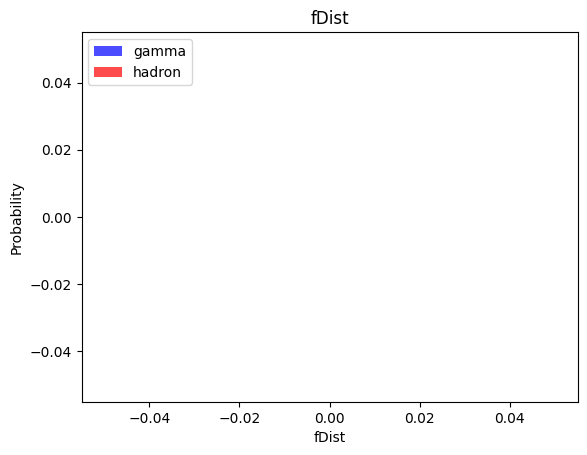

In [7]:
# crea una serie di istogrammi che mostrano la distribuzione dei dati per ciascuna colonna del DataFrame df, separati per le due classi ("gamma" e "hadron").
#passo a passo:
#1)for label in cols[:-1]:: Questo è un ciclo for che scorre attraverso tutte le colonne del DataFrame df ad eccezione dell'ultima colonna (quella indicata da cols[:-1]). L'ultima colonna è la colonna "class" che contiene le etichette di classe.
#2)plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True): Questa riga crea un istogramma dei valori nella colonna label (cioè, la colonna attualmente in esame) per le righe in cui il valore nella colonna "class" è uguale a 1 (classe "gamma").
# Gli argomenti specificati includono il colore dell'istogramma, l'etichetta della classe, la trasparenza (alpha), e il parametro density=True per visualizzare la distribuzione di probabilità anziché il conteggio grezzo degli eventi.
#3)plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True): Questa riga fa la stessa cosa della riga precedente, ma per le righe in cui il valore nella colonna "class" è uguale a 0 (classe "hadron").
#4) plt.title(label): Imposta il titolo del grafico come il nome della colonna attualmente in esame.
#5) plt.ylabel("Probability"): Etichetta l'asse y con "Probability" (Probabilità).
#6)plt.xlabel(label): Etichetta l'asse x con il nome della colonna attualmente in esame.
#7) plt.legend(): Aggiunge una legenda al grafico per distinguere le due classi ("gamma" e "hadron").
#8)plt.show(): Mostra il grafico dell'istogramma per la colonna corrente.

for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, validation, test datasets

In [8]:
#suddivido il DataFrame df in tre insiemi di dati separati: un set di addestramento (train), un set di validazione (valid), e un set di test (test)
#passo a passo:
#1) df.sample(frac=1): Questa parte del codice fa un campionamento casuale del DataFrame df. La chiamata a sample(frac=1) mischia casualmente tutte le righe del DataFrame, in modo che siano in un ordine casuale.
# Questo è spesso fatto per garantire che i dati siano casualmente distribuiti prima della suddivisione.
#2) [int(0.6*len(df)), int(0.8*len(df))]: Questo è un elenco di indici utilizzati per suddividere il DataFrame. La suddivisione è basata sulla proporzione dei dati originali:
# -Il primo indice int(0.6*len(df)) rappresenta la fine del set di addestramento. Il 60% dei dati totali sarà assegnato al set di addestramento.
# -Il secondo indice int(0.8*len(df)) rappresenta la fine del set di validazione. Il 20% dei dati totali sarà assegnato al set di validazione.
# - Gli ultimi dati, corrispondenti al 20% rimanente, saranno assegnati al set di test.
#3) np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]: Questa riga effettua la suddivisione effettiva dei dati utilizzando gli indici calcolati nel passaggio precedente.
#Il metodo np.split() divide il DataFrame mischiato in tre parti basate sugli indici specificati. Di conseguenza, otterrai tre variabili (train, valid, test) ciascuna contenente una parte dei dati originali, seguendo la proporzione specificata.

#Alla fine del processo, si avrà:

# train: Il set di addestramento, che rappresenta il 60% dei dati originali.
# valid: Il set di validazione, che rappresenta il 20% dei dati originali.
# test: Il set di test, che rappresenta anch'esso il 20% dei dati originali.

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [9]:
#Definisco una funzione chiamata scale_dataset(dataframe) che prende in input un DataFrame dataframe e lo scala (inizialmente considera l'oversample falso)
#passo a passo:
#1) X = dataframe[dataframe.cols[:-1]].values: Questa riga seleziona le colonne del DataFrame escludendo l'ultima colonna. (features matrix )
#2) y = dataframe[dataframe.cols[-1]].values: Questa riga seleziona l'ultima colonna del DataFrame (target vector).
#3) scaler = StandardScaler(): Qui viene creato un oggetto StandardScaler dalla libreria scikit-learn. Questo scaler è utilizzato per standardizzare le features.
#4) X = scaler.fit_transform(X): Le features X (ad eccezione dell'ultima colonna) vengono standardizzate utilizzando lo StandardScaler.
# Questa operazione scala le features in modo che abbiano una media di 0 e una deviazione standard di 1.
#6) se oversample è True, il codice eseguirà l'oversampling dei dati utilizzando il modulo RandomOverSampler (che si usa generare nuovi campioni dalle classi sottorappresentate in modo casuale per bilanciare la distribuzione delle classi)
# e sovrascriverà le variabili X e y con i dati oversampled. In questo modo, la funzione garantirà che i dati siano bilanciati se oversample è impostato su True, mentre se oversample è False, la funzione non applicherà alcun oversampling e continuerà con le operazioni successive.
#5) data = np.hstack((X, np.reshape(y, (-1, 1)))): Le features standardizzate X e il target vector y vengono concatenate orizzontalmente (hstack) per formare un nuovo array data  in modo che siano nella stessa matrice.
# in particolare np.reshape(y, (-1, 1)): Questo comando utilizza la funzione np.reshape() per cambiare la forma dell'array y. (-1, 1) indica che si vuole cambiare la forma in modo che ci sia una singola colonna
# (-1 indica che il numero di righe deve essere determinato automaticamente in base al numero di elementi in y) e il numero di colonne è 1. Questo è spesso fatto quando si ha bisogno di trasformare un array 1D (ad una dimensione) in una matrice con una singola colonna.
#6) return data, X, y: restituisce tre valori: data, X, e y. data è l'array risultante con features standardizzate e la taget vector y, X contiene le features standardizzate e y i valori dell'ultima colonna (target vector).

#PS: cos'è l'oversampling: L'oversampling è una tecnica utilizzata nell'apprendimento automatico per affrontare problemi di classificazione sbilanciati, in cui alcune classi hanno molte meno istanze rispetto ad altre.
#L'obiettivo dell'oversampling è bilanciare la distribuzione delle classi nel dataset, in modo che il modello di apprendimento automatico non sia influenzato in modo sproporzionato dalla classe maggioritaria.
#L'oversampling comporta la creazione di nuovi campioni o duplicati dalle classi sottorappresentate in modo da aumentare il numero di campioni in queste classi. Ciò aiuta a ridurre l'effetto del disavanzo di dati nelle classi sottorappresentate
#e può portare a una migliore capacità del modello di riconoscere e classificare correttamente le istanze di queste classi minoritarie.
#Ci sono diversi metodi di oversampling, tra cui il campionamento casuale (come il RandomOverSampler), il campionamento basato su algoritmi (come il Synthetic Minority Over-sampling Technique o SMOTE), e altri.
#La scelta del metodo di oversampling dipende spesso dalla natura dei dati e del problema che si sta affrontando.

def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [10]:
# il codice suddivide i dati in tre set (addestramento, convalida e test) e applica l'oversampling solo al set di addestramento.
#Questo è un approccio comune quando si lavora con dataset sbilanciati per evitare il sovraddestramento e assicurare che il modello sia valutato in modo equo sui dati di convalida e test.
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

Modello K nearest neighbors o KNN (traducibile come i primi K vicini)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
# creazione di un modello KNN con un solo vicino più vicino che viene addestrato utilizzando il set di addestramento X_train e y_train.
#passo a passo:
# 1) KNeighborsClassifier(n_neighbors=1): Qui si crea un'istanza di un modello KNN utilizzando la classe KNeighborsClassifier da una libreria come scikit-learn (sklearn).
# Il parametro n_neighbors è impostato su 1, il che significa che il modello considererà solo il singolo vicino più vicino per la classificazione.
# In altre parole, il modello classificherà un punto dati basandosi solo sulla classe dell'istanza più vicina nel training set.
# 2) knn_model.fit(X_train, y_train): Qui si addestra il modello KNN utilizzando il training set. X_train rappresenta le caratteristiche (o attributi) delle istanze di addestramento,
# mentre y_train rappresenta le etichette di classe corrispondenti a tali istanze. Il modello apprenderà come assegnare le etichette di classe alle istanze di addestramento basandosi sulla loro similarità ai vicini più vicini.

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
#questo codice applica il modello KNN precedentemente addestrato per fare previsioni sul set di dati di test X_test, restituendo le etichette di classe previste in y_pred.
# Questo è un passo comune nell'uso di modelli di machine learning per valutare le prestazioni del modello e confrontare le previsioni con le etichette di classe reali nei dati di test.
y_pred = knn_model.predict(X_test)

In [15]:
#Eseguendo questo codice, si ottiene un output che fornisce le metriche di valutazione delle prestazioni del modello di classificazione basate sulla comparazione tra le etichette reali e le previsioni del modello per il set di dati di test.
# Questo è un passo comune nell'analisi delle prestazioni dei modelli di classificazione.
# In generale, quando si legge questo output, si cerca di ottenere una comprensione delle prestazioni del modello per ciascuna classe, in particolare per precisione e richiamo.
# Una precisione elevata è importante quando si desidera ridurre i falsi positivi, mentre un alto richiamo è importante quando si desidera ridurre i falsi negativi.
# Il punteggio F1 è utile per bilanciare queste due metriche. L'accuratezza globale fornisce una visione complessiva delle prestazioni del modello su tutto il set di dati di test,
# ma potrebbe non essere informativa se le classi sono sbilanciate.
# In questo caso il punteggio F! (media armonica tra precisione e richiamo) è migliore per 1 (che ricordiamo sarebbe gamma) che per 0 (che sarebbe hadron)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           g       0.84      0.89      0.86      2508
           h       0.75      0.67      0.71      1296

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
# Qui si crea un'istanza di un modello Naive Bayes utilizzando la classe GaussianNB da una libreria come scikit-learn (sklearn).
nb_model = GaussianNB()

In [19]:
#Qui si addestra il modello Naive Bayes utilizzando il training set. X_train rappresenta le caratteristiche (o attributi) delle istanze di addestramento,
# mentre y_train rappresenta le etichette di classe corrispondenti a tali istanze. Il modello apprenderà come assegnare le etichette di classe alle istanze di addestramento basandosi sulla loro similarità ai vicini più vicini.

nb_model = nb_model.fit(X_train, y_train)

In [20]:
y_pred = nb_model.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           g       0.74      0.89      0.81      2508
           h       0.65      0.41      0.50      1296

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.73      0.71      3804

